In [80]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve )

In [82]:
df = pd.read_csv(r"C:\Users\91777\Internship\Housing.csv")

In [84]:
df.shape

(545, 13)

In [86]:
df.isnull().sum().sum()

0

In [88]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [90]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [92]:
# Binary classification target: price → expensive or not
median_price = df['price'].median()
df['price_binary'] = (df['price'] > median_price).astype(int)

In [94]:
# Drop original price column
df.drop('price', axis=1, inplace=True)

In [96]:
# 5. Handle categorical variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [98]:
# Split features and target
X = df.drop('price_binary', axis=1)
y = df['price_binary']

In [100]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [106]:
# Predict probabilities and labels
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # sigmoid outputs
y_pred = (y_probs >= 0.5).astype(int)  # default threshold = 0.5

In [108]:
# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

In [110]:
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Confusion Matrix:
 [[47  4]
 [12 46]]
Accuracy: 0.85
Precision: 0.92
Recall: 0.79
F1 Score: 0.85
ROC-AUC: 0.92


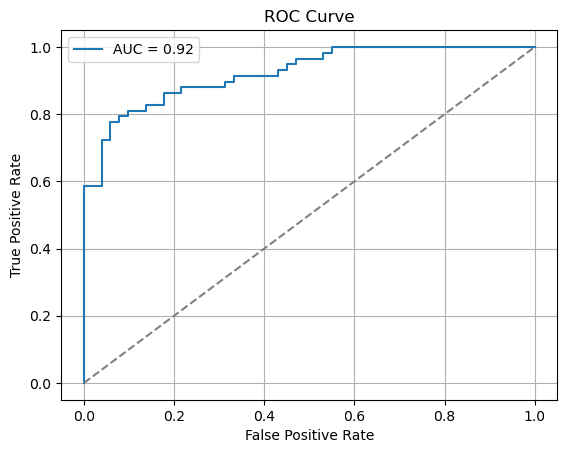

In [112]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [122]:
# Try a custom threshold
custom_threshold = 0.6
y_pred_custom = (y_probs >= custom_threshold).astype(int)
print(f"New Confusion Matrix @ threshold {custom_threshold}:\n", confusion_matrix(y_test, y_pred_custom))

New Confusion Matrix @ threshold 0.6:
 [[49  2]
 [16 42]]
